### Problem Statement

The data is related with Profiling a Cyber Criminal by their personal traits and beliefs.
It is a dummy data analysis where clustering algorithm (k-means clustering) is used to cluster the categories.
Analysis of the of the data is done inorder to generate some useful insights.

### Creating Dummy data

In [358]:
import numpy as np
import pandas as pd

In [359]:
columns = ["Technical Know-How", "Personal Traits", "Social Characteristics","Motivating Factors"]
data = np.array([['Intelligent', 'Impatient', 'Anti-establishment','Monetary Gain'], 
                 ['Focused', 'Determined', 'Lack Social Skills','Greed'],
                 ['Well-trained', 'Insensitive', 'Inferiority Complex','Political Beliefs'],
                 ['Strategic Planners', 'Secretive', 'Low self-worth','Emotions'],
                 ['Bully', 'Aggressive', 'Marginalised','Disregard for law'],
                 ['Resourceful', 'Strong-willed', 'Radical','Intolerance'],
                 ['Goal-oriented', 'Passionate', 'Mass-destruction','Thrill-seeking'],
                 ['Well-networked', 'Insensitive', 'Misguided','Risk Tolerance'],
                 ['Well-organized', 'Chaotic state of mind', 'Brain-washed','Manipulate Others'],
                 ['Well Trained', 'Inhuman Psyche', 'Anti-social','Need to control others'],
                 ['Creative', 'Vengenful', 'Anti-state','Concealed Existence'],
                 ['Smart', 'Coercive', 'Unlawful','Political Support'],
                 ['Skilful', 'Coward', 'Rebellious','Religious Fundamentalism'],])
df = pd.DataFrame(data=data, columns=columns)

In [360]:
def generate_age(sample):
    return np.random.randint(15, 70, size = sample, dtype = 'int')

In [361]:
def generate_city(size):
    city_names=['Kathmandu','Bhaktapur','Lalitpur','Pokhara','Itahari','Dharan','Biratnagar','Chitwan','Butwal','Hetauda']
    city=pd.DataFrame(np.repeat(city_names,size/len(city_names)),columns=['City'])
    remove_n = np.random.randint(100,1000)
    drop_indices = np.random.choice(city.index, 100, replace=False)
    df_subset = city.drop(drop_indices)
    df_subset= df_subset.sample(frac=1).reset_index(drop=True)
    return df_subset

    

In [362]:
def generate_dataset(dataframe,sample_rows):
    df=dataframe
    temp_df=[]
    for row in df.itertuples(index=False):
        temp_df.extend([list(row)]*sample_rows)
        temp_df.append(list(row))
        
    df=pd.DataFrame(temp_df,columns=df.columns)
    np.random.seed(330)
    remove_n = np.random.randint(100,1000)
    drop_indices = np.random.choice(df.index, 100, replace=False)
    df_subset = df.drop(drop_indices)
    df_subset= df_subset.sample(frac=0.75).reset_index(drop=True)
    return df_subset

In [363]:
df=generate_dataset(df,250)
age= generate_age(df.shape[0])
df_age=pd.DataFrame(age,columns=['Age'])
df=pd.concat([df,df_age],axis=1)
city=generate_city(df.shape[0])
df=pd.concat([df,city],axis=1)


In [364]:
df.dropna()

,Technical Know-How,Personal Traits,Social Characteristics,Motivating Factors,Age,City
0,Bully,Aggressive,Marginalised,Disregard for law,19,Chitwan
1,Skilful,Coward,Rebellious,Religious Fundamentalism,59,Lalitpur
2,Well-networked,Insensitive,Misguided,Risk Tolerance,56,Biratnagar
3,Well Trained,Inhuman Psyche,Anti-social,Need to control others,31,Pokhara
4,Goal-oriented,Passionate,Mass-destruction,Thrill-seeking,53,Itahari
...,...,...,...,...,...,...
2265,Smart,Coercive,Unlawful,Political Support,62,Biratnagar
2266,Resourceful,Strong-willed,Radical,Intolerance,29,Hetauda
2267,Goal-oriented,Passionate,Mass-destruction,Thrill-seeking,37,Lalitpur
2268,Well Trained,Inhuman Psyche,Anti-social,Need to control others,47,Bhaktapur


In [365]:
## save the data in excel file.
# df.to_csv('cyber_crime_dataset.csv',index=False)

### Data Information (Categorical)

* Technical Know-How - String
* Personal Traits - String
* Social Characteristics - String
* Motivating Factors - String
* Age- int
* City - String

In [366]:
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [367]:
# Converting age into categorical variable.
df['Age_Range']=pd.cut(df['Age'],[0,20,30,40,50,60],labels=['0-20','30-40','40-50','50-60','60-70'])
df=df.drop('Age',axis=1)
df.dropna()

,Technical Know-How,Personal Traits,Social Characteristics,Motivating Factors,City,Age_Range
0,Bully,Aggressive,Marginalised,Disregard for law,Chitwan,0-20
1,Skilful,Coward,Rebellious,Religious Fundamentalism,Lalitpur,60-70
2,Well-networked,Insensitive,Misguided,Risk Tolerance,Biratnagar,60-70
3,Well Trained,Inhuman Psyche,Anti-social,Need to control others,Pokhara,40-50
4,Goal-oriented,Passionate,Mass-destruction,Thrill-seeking,Itahari,60-70
...,...,...,...,...,...,...
2264,Skilful,Coward,Rebellious,Religious Fundamentalism,Kathmandu,30-40
2266,Resourceful,Strong-willed,Radical,Intolerance,Hetauda,30-40
2267,Goal-oriented,Passionate,Mass-destruction,Thrill-seeking,Lalitpur,40-50
2268,Well Trained,Inhuman Psyche,Anti-social,Need to control others,Bhaktapur,50-60


### Model Building

In [368]:
df_copy=df.copy()

### Data Preparation

In [369]:
## Convert the columns to the same data type for label encoding
def convert_column(df,column):
    df[column]=le.fit_transform(df[column].astype(str))
    return df

In [370]:
## Converting the columns to the same data type

df_dummy=convert_column(df,'Technical Know-How')
df_dummy=convert_column(df,'Personal Traits')
df_dummy=convert_column(df,'Social Characteristics')
df_dummy=convert_column(df,'Motivating Factors')
df_dummy=convert_column(df,'City')
df_dummy=convert_column(df,'Age_Range')

df=df_dummy

In [371]:
from sklearn import preprocessing
# Checking Null values
df.isnull().sum()*100/df.shape[0]
le = preprocessing.LabelEncoder()
df=df.apply(le.fit_transform)
df




,Technical Know-How,Personal Traits,Social Characteristics,Motivating Factors,City,Age_Range
0,0,0,7,1,3,0
1,6,3,11,10,8,4
2,10,7,9,11,1,4
3,9,6,1,7,9,2
4,3,8,8,12,6,4
...,...,...,...,...,...,...
2367,8,9,6,2,10,3
2368,7,2,12,9,10,0
2369,9,6,1,7,10,2
2370,7,2,12,9,10,3


In [372]:
# Importing Libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [373]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.410425,-0.555263
1,0.684471,-0.390858


### Elbow Criterion:

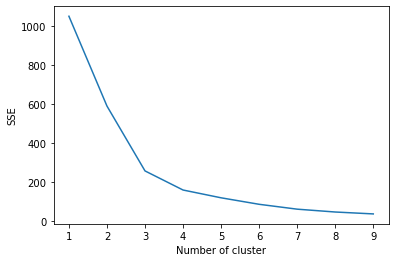

In [374]:
## To find out the best value of K using the elbow graph.
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [375]:
## From the graph it is clear that the best value for K is 3.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

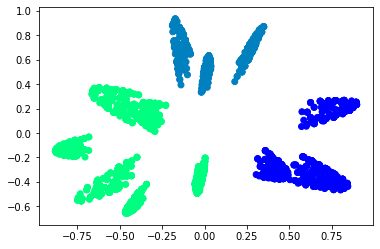

In [376]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [377]:
df_copy

,Technical Know-How,Personal Traits,Social Characteristics,Motivating Factors,City,Age_Range
0,Bully,Aggressive,Marginalised,Disregard for law,Chitwan,0-20
1,Skilful,Coward,Rebellious,Religious Fundamentalism,Lalitpur,60-70
2,Well-networked,Insensitive,Misguided,Risk Tolerance,Biratnagar,60-70
3,Well Trained,Inhuman Psyche,Anti-social,Need to control others,Pokhara,40-50
4,Goal-oriented,Passionate,Mass-destruction,Thrill-seeking,Itahari,60-70
...,...,...,...,...,...,...
2367,Strategic Planners,Secretive,Low self-worth,Emotions,NaN,50-60
2368,Smart,Coercive,Unlawful,Political Support,NaN,0-20
2369,Well Trained,Inhuman Psyche,Anti-social,Need to control others,NaN,40-50
2370,Smart,Coercive,Unlawful,Political Support,NaN,50-60


### Data Analysis

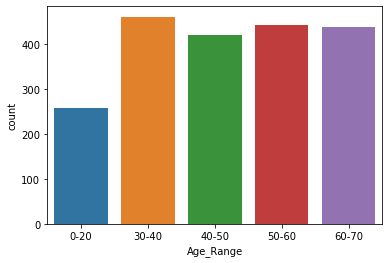

In [384]:
## Age Group
sns.countplot(x=df_copy['Age_Range'])

Text(0.5, 1.0, 'City Ranked by Density of Mass-Destruction Personality traits')

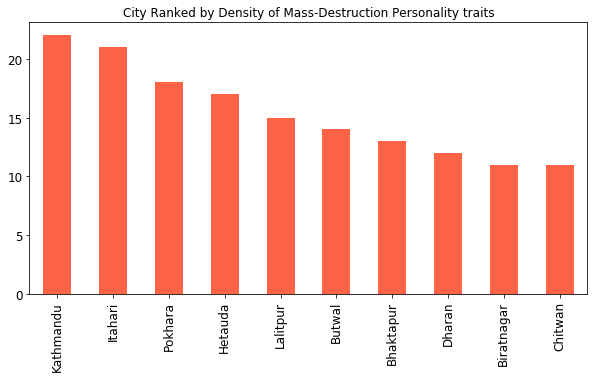

In [405]:
## Risk Individual
risk=df_copy[df_copy['Social Characteristics'] =='Mass-destruction'].dropna()
ax=risk['City'].value_counts().plot.bar(
    figsize=(10,5),
    color=['Tomato'],
    fontsize=12)
ax.set_title("City Ranked by Density of Mass-Destruction Personality traits")

If the dataset was a real one with genuine observations than from the graph we could conclude that Kathmandu and Itahari are 2 major potential cities where the mass destruction personlaity traits are present. The observation can be used by the concerned authorities to target the general public in these cities to supress such personality in the future.

Text(0.5, 1.0, 'Age Range by Density of Mass-Destruction Personality traits')

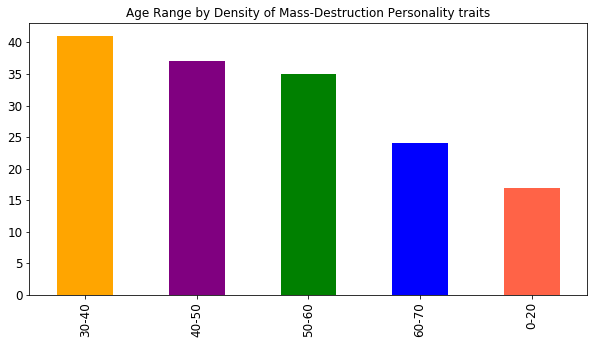

In [415]:
ax=risk['Age_Range'].value_counts().plot.bar(
    figsize=(10,5),
    color=['orange','purple','green','blue','tomato'],
    fontsize=12)
ax.set_title("Age Range by Density of Mass-Destruction Personality traits")

Here, we can observe that most of the people in the range 30-40 years have such destructive mindset. They can be more dangerous than any other age groups but on the other hand the people in their early 20's are less in number which is a positive aspects as we can target an awarenes campaign to this specific age group in the early stage so that their destructive mindset can be supressed. 

Text(0.5, 1.0, 'City Ranked by Density of Monetary Gain Personality')

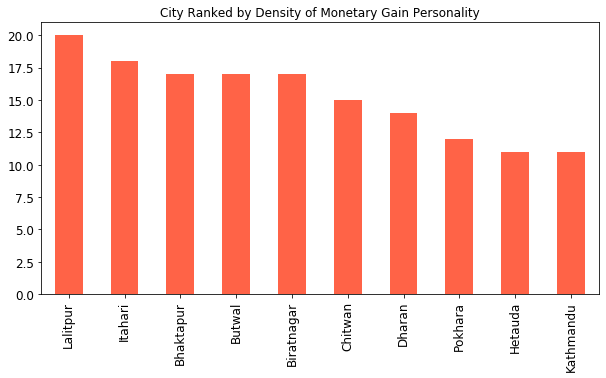

In [417]:
## Monetary Gain
money=df_copy[df_copy['Motivating Factors'] =='Monetary Gain'].dropna()
ax=money['City'].value_counts().plot.bar(
    figsize=(10,5),
    color=['Tomato'],
    fontsize=12)
ax.set_title("City Ranked by Density of Monetary Gain Personality")

Text(0.5, 1.0, 'Age Range by Density of Monetary Gain Personality traits')

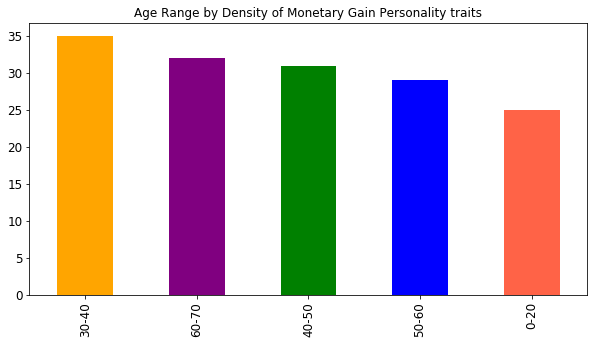

In [418]:
ax=money['Age_Range'].value_counts().plot.bar(
    figsize=(10,5),
    color=['orange','purple','green','blue','tomato'],
    fontsize=12)
ax.set_title("Age Range by Density of Monetary Gain Personality traits")

Based on the plots above, these are the insights that I was able to gather. There may be more insights that I'm not seeing, or other visualization methods could show more interesting observations.

### Conclusion

In conclusion, the K-means clustering technique is a simple quick algorithm that can be applied to large datasets to separate them into different partitions; analysis of these partitions may provide a better characterization of Profiling a Cyber Criminal and may be of additional benefit in predicting which city holds the major threat and which age group of people are responsible. The analysis made it clear that with enough data even a dummy data can make sense. If the experiment is conduded in such scale than the risk of cyber crime can be minimized to some extend. A early plan can be formulated to aware the public about different personality traits and how to avoid getting trapped by such criminal activities.